In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast-cancer.csv to breast-cancer.csv


In [3]:
# Step 1: Load and Prepare Data
df = pd.read_csv('breast-cancer.csv')

In [4]:
# Check column names and drop unnecessary ones (e.g., ID columns)
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

In [5]:
# Encode diagnosis: M = 1 (Malignant), B = 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [6]:
# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [7]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 2: Reduce to 2D for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [9]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [10]:
# Step 3: Train SVM with Linear Kernel
svc_linear = SVC(kernel='linear', C=1)
svc_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [11]:
# Step 4: Train SVM with RBF Kernel
svc_rbf = SVC(kernel='rbf', gamma='scale', C=1)
svc_rbf.fit(X_train, y_train)

SVC(C=1)

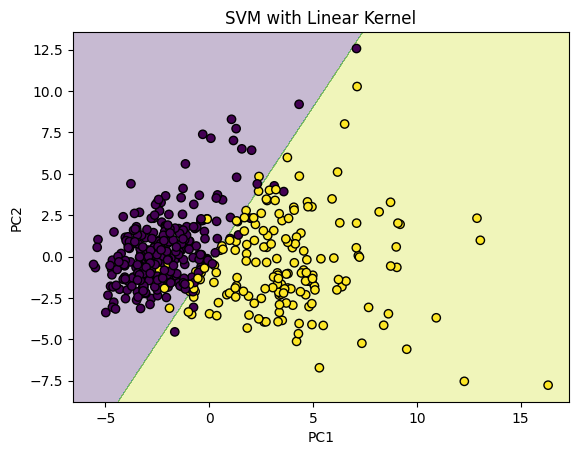

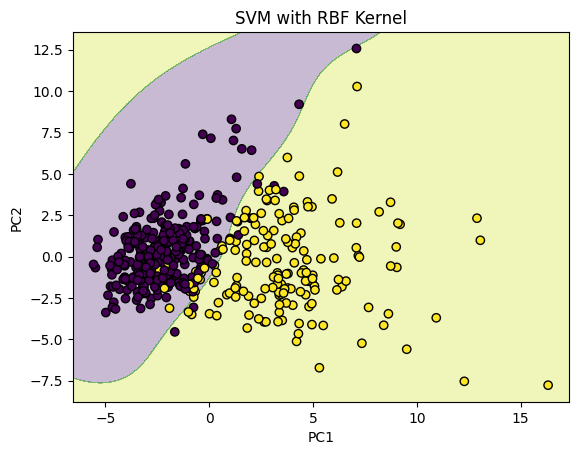

In [12]:
# Step 5: Visualization Function
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

plot_decision_boundary(svc_linear, X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svc_rbf, X_train, y_train, "SVM with RBF Kernel")

In [13]:
# Step 6: Hyperparameter Tuning (GridSearch)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from Grid Search:", grid.best_params_)


Best Parameters from Grid Search: {'C': 10, 'gamma': 0.01}


In [14]:
# Step 7: Cross-Validation Score
scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.9789318428815401


In [15]:
# Final Evaluation on Test Set
y_pred = grid.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[71  0]
 [ 3 40]]
